In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome
from pylift.generate_data import dgp

In [2]:
df = dgp(N=10000, discrete_outcome=True)
df.head()

,0,1,2,Treatment,Outcome
0,0.808182,0.003135,0.025536,0.0,1.0
1,0.703666,0.686525,0.760700,0.0,1.0
2,0.635157,0.414102,0.782564,0.0,1.0
3,0.772824,0.166943,0.063047,0.0,1.0
4,0.098003,0.895031,0.542203,1.0,1.0


In [3]:
# stratified sampling of train and test
up = TransformedOutcome(df, col_treatment='Treatment', col_outcome='Outcome', stratify=df['Treatment'])

In [4]:
print("train shape", up.df_train.shape)
print("test shape", up.df_test.shape)

train shape (8000, 6)
test shape (2000, 6)


# Feature Importance

<AxesSubplot:xlabel='NIV', ylabel='Features'>

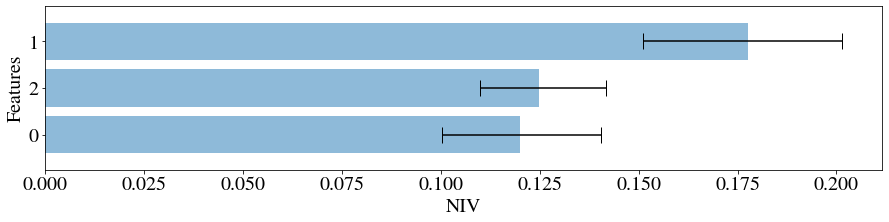

In [5]:
# net information value
up.NIV()

<AxesSubplot:title={'center':'NWOE by bin for 2'}, xlabel='Bin Interval'>

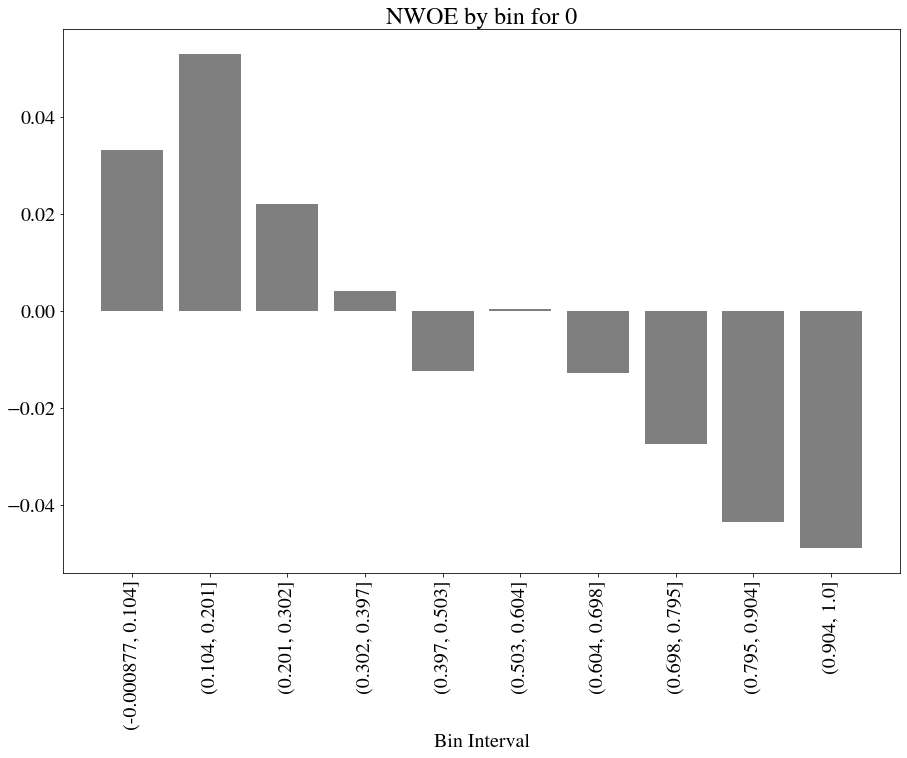

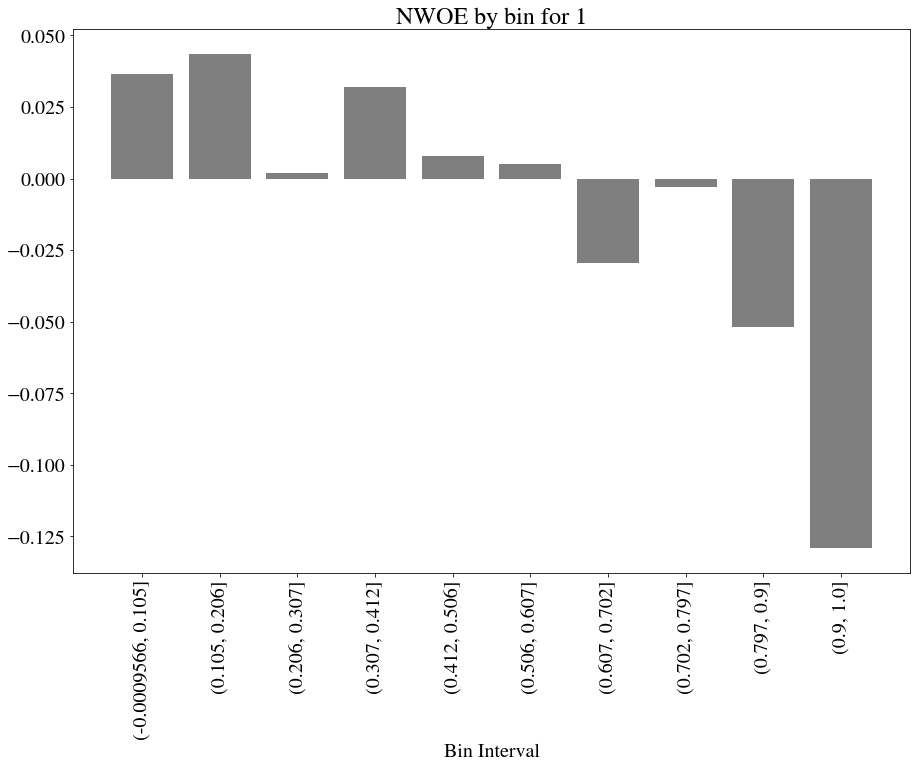

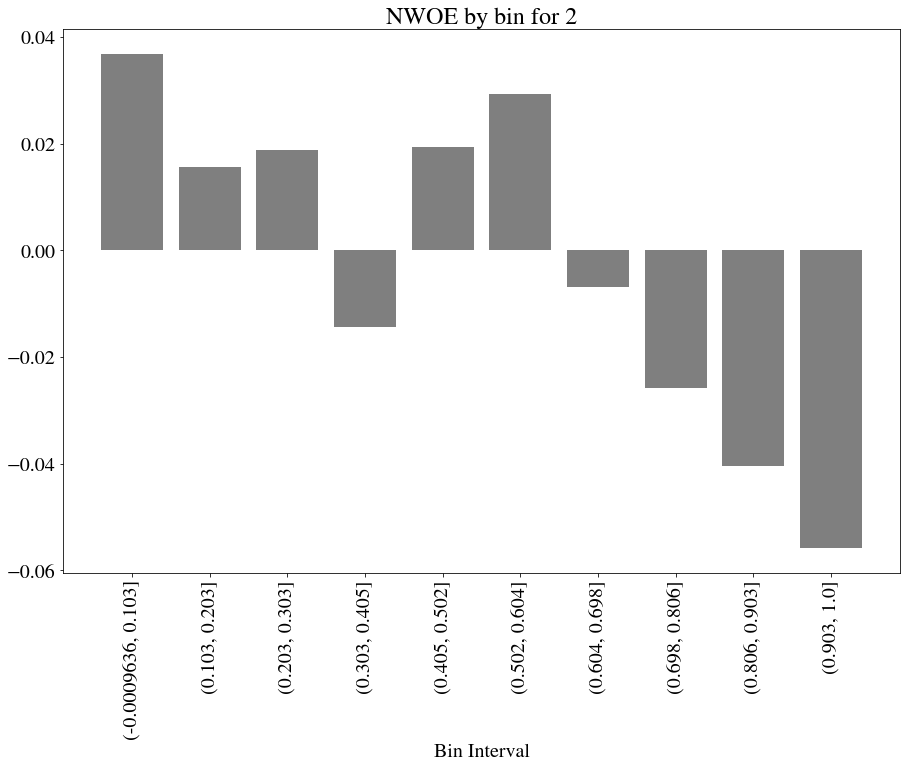

In [6]:
# net weight of evidence
up.NWOE()

# Model Training

In [7]:
# by default uses xgboost regressor
params = {
    'n_estimators': 50,
    'max_depth': 3
}

up.fit(**params)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

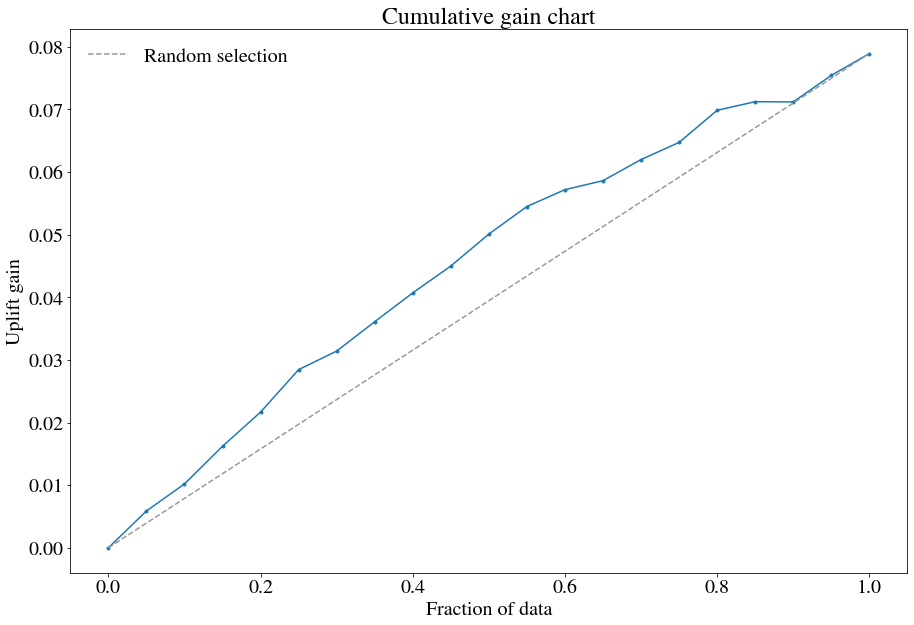

In [8]:
up.plot()

# Confidence Interval

It's generally pretty useful to plot error bars to get a feel for how noisy your prediction is

We implemented two ways to do this:

1. Randomly shuffling your train_test_split with a different seed, using the same hyperparameters, and plotting the resulting curves. This gives error bars around your qini curve. The error bars are calculated using `up.shuffle_fit(params=params)`, where params is a dictionary of your hyperparameters. They can then be plotted by adding the keyword argument `show_shuffle_fits=True` to `up.plot()`.

2. Randomly shuffling predictions to see what you might get from fitting noise. This gives error bars around the random selection line. This can be calculated similarly by using `up.noise_fit()`, and plotted by passing the keyword argument `show_noise_fits=True` to `up.plot()`.

In [9]:
up.shuffle_fit(params=params, iterations=5)

Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x1590bdb50>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x15900e160>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x15926ef40>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x159070490>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x15900e910>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

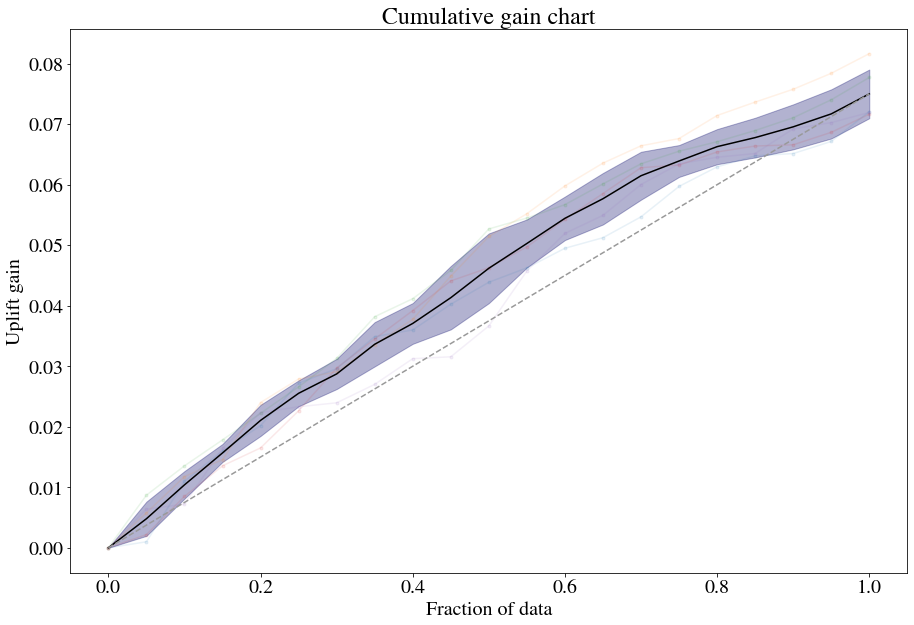

In [10]:
up.plot(show_shuffle_fits=True)

In [11]:
up.noise_fit()

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

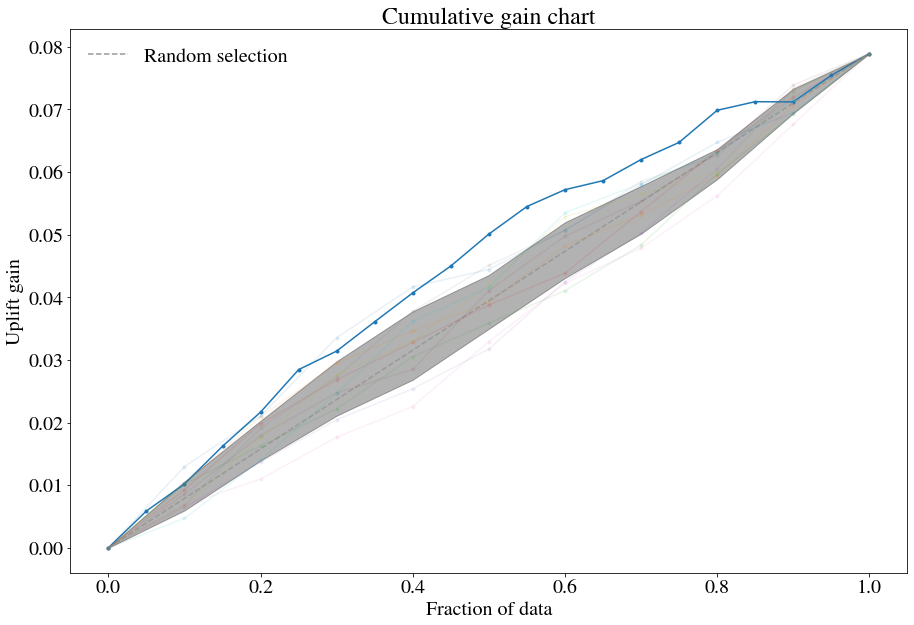

In [12]:
up.plot(show_noise_fits=True)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Uplift curve'}, xlabel='Fraction of data', ylabel='Lift'>

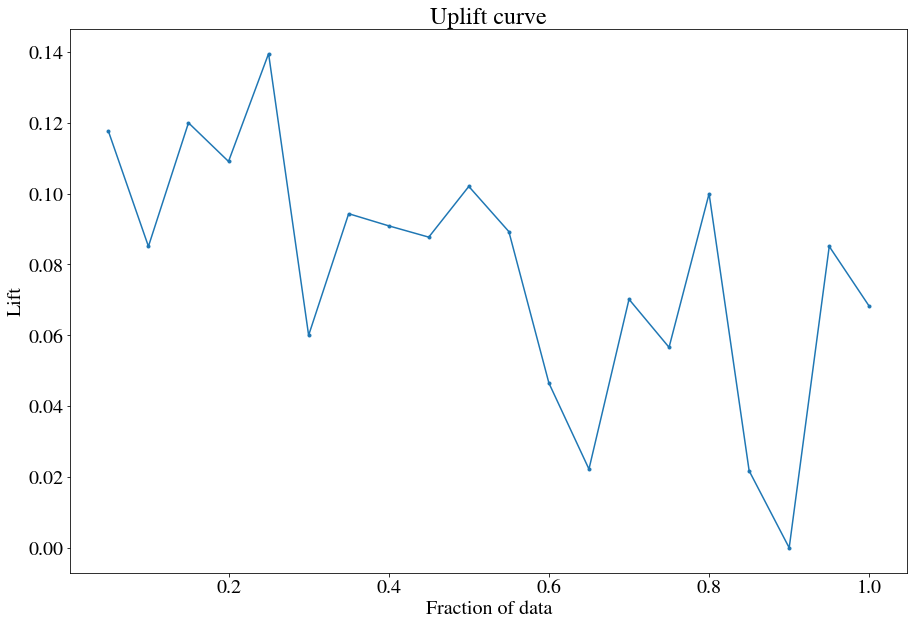

In [13]:
up.plot_uplift()

<AxesSubplot:title={'center':'Adjusted Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

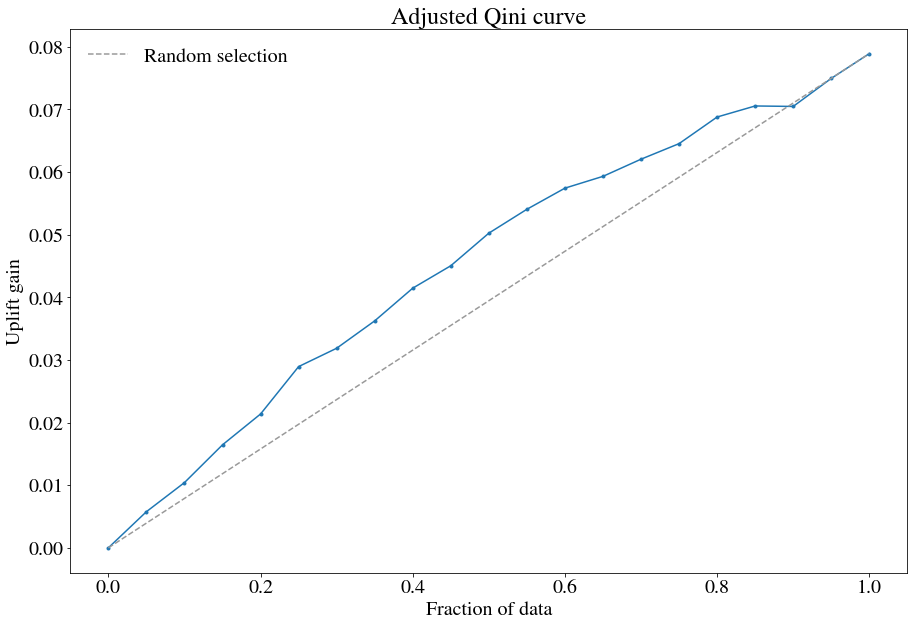

In [14]:
# adjusted qini curve
up.plot_aqini()

In [15]:
up.test_results_.prediction

array([-0.10725898,  0.31205127, -0.00591708, ...,  0.01560817,
        0.15999793, -0.13214014], dtype=float32)